<a href="https://www.kaggle.com/code/peacehegemony/textobject-pair-exploration?scriptVersionId=119197404" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd



df = pd.read_csv("/kaggle/input/text-object-descriptions/free-textobject-pair-descriptions-DFE.csv")

Next, we can take a look at the first few rows of the dataframe to get a sense of the data.

In [2]:
df.head()

,_unit_id,_unit_state,_trusted_judgments,_last_judgment_at,keyword_1,keyword_2,image_url
0,693009422,finalized,3,3/23/15 13:08,It is a package of pretzels.\nIt is a bag of p...,It is a jar of pickled peppers.\nIt is a jar o...,http://homes.cs.washington.edu/~sunyuyin/RGBD_...
1,693009423,finalized,3,3/23/15 14:38,It is a box of yellow rice\nIt is a box of Zat...,It is a box of oreo sticks\nIt is a box of Gol...,http://homes.cs.washington.edu/~sunyuyin/RGBD_...
2,693009424,finalized,3,3/23/15 3:28,It's a chips bag.\nIt is a bag\nIt is a bag of...,It's a food sauce.\nIt is a jar\nIt is a jar.,http://homes.cs.washington.edu/~sunyuyin/RGBD_...
3,693009425,finalized,3,3/23/15 3:26,This is a box.\nIt's a cookie box.\nIt is a box,This is a cup.\nIt's a yoplait.\nIt is yoplait,http://homes.cs.washington.edu/~sunyuyin/RGBD_...
4,693009426,finalized,3,3/23/15 3:31,It is yoplait\nIt is yougurt\nIt is a containe...,It is a jar\nIt is alfredo sauce\nIt is a jar ...,http://homes.cs.washington.edu/~sunyuyin/RGBD_...


We can also check the shape of the dataframe and get some summary statistics of the data using the .shape and .describe() methods.

In [3]:
print(df.shape)
df.describe()

(1225, 7)


,_unit_id,_trusted_judgments
count,1.225000e+03,1225.0
mean,6.930100e+08,3.0
std,3.555119e+02,0.0
min,6.930094e+08,3.0
25%,6.930097e+08,3.0
50%,6.930100e+08,3.0
75%,6.930103e+08,3.0
max,6.930107e+08,3.0


One interesting aspect of the dataset is the image pairs, so let's take a look at some of the image URLs. We can do this by using the .sample() method to select a random sample of rows from the dataframe and then displaying the image URLs.

In [4]:
%%capture url
sample_df = df.sample(5)
for i, row in sample_df.iterrows():
    print(row["image_url"])

We can also take a look at the descriptions of the objects in the image pairs. We can do this by using the .iterrows() method to loop through the rows of the dataframe and then printing the descriptions of the first and second objects in each pair.

In [5]:
%%capture sample
for i, row in sample_df.iterrows():
    print("First object: ", row["keyword_1"])
    print("Second object: ", row["keyword_2"])

Finally, we can perform some data pre-processing on the descriptions of the objects, such as lowercasing the text, removing punctuation, and tokenizing the text. We can then use this processed data to train a machine learning model to classify the image pairs based on their descriptions.

In [6]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords



stop_words = set(stopwords.words('english'))

In [7]:
%%capture tokens
for i, row in sample_df.iterrows():
    keyword_1 = row["keyword_1"]
    keyword_2 = row["keyword_2"]
    keyword_1_tokens = [token.lower() for token in word_tokenize(keyword_1) if token.isalpha() and token not in stop_words]
    keyword_2_tokens = [token.lower() for token in word_tokenize(keyword_2) if token.isalpha() and token not in stop_words]
    print("First object tokens: ", keyword_1_tokens)
    print("Second object tokens: ", keyword_2_tokens)

In [8]:
df["keyword_1_tokens"] = df.apply(lambda row: [token.lower() for token in word_tokenize(row["keyword_1"]) if token.isalpha() and token not in stop_words], axis=1)
df["keyword_2_tokens"] = df.apply(lambda row: [token.lower() for token in word_tokenize(row["keyword_2"]) if token.isalpha() and token not in stop_words], axis=1)


# Join the lists of tokens back into strings
df["keyword_1_processed"] = df["keyword_1_tokens"].apply(lambda x: " ".join(x))
df["keyword_2_processed"] = df["keyword_2_tokens"].apply(lambda x: " ".join(x))


# Concatenate the descriptions to form a single feature
df["descriptions"] = df["keyword_1_processed"] + " " + df["keyword_2_processed"]

To visualize the data, we can plot some graph. One approach could be to use a word cloud to show the most common words in the descriptions of the objects. We can use the wordcloud library to create the word cloud.

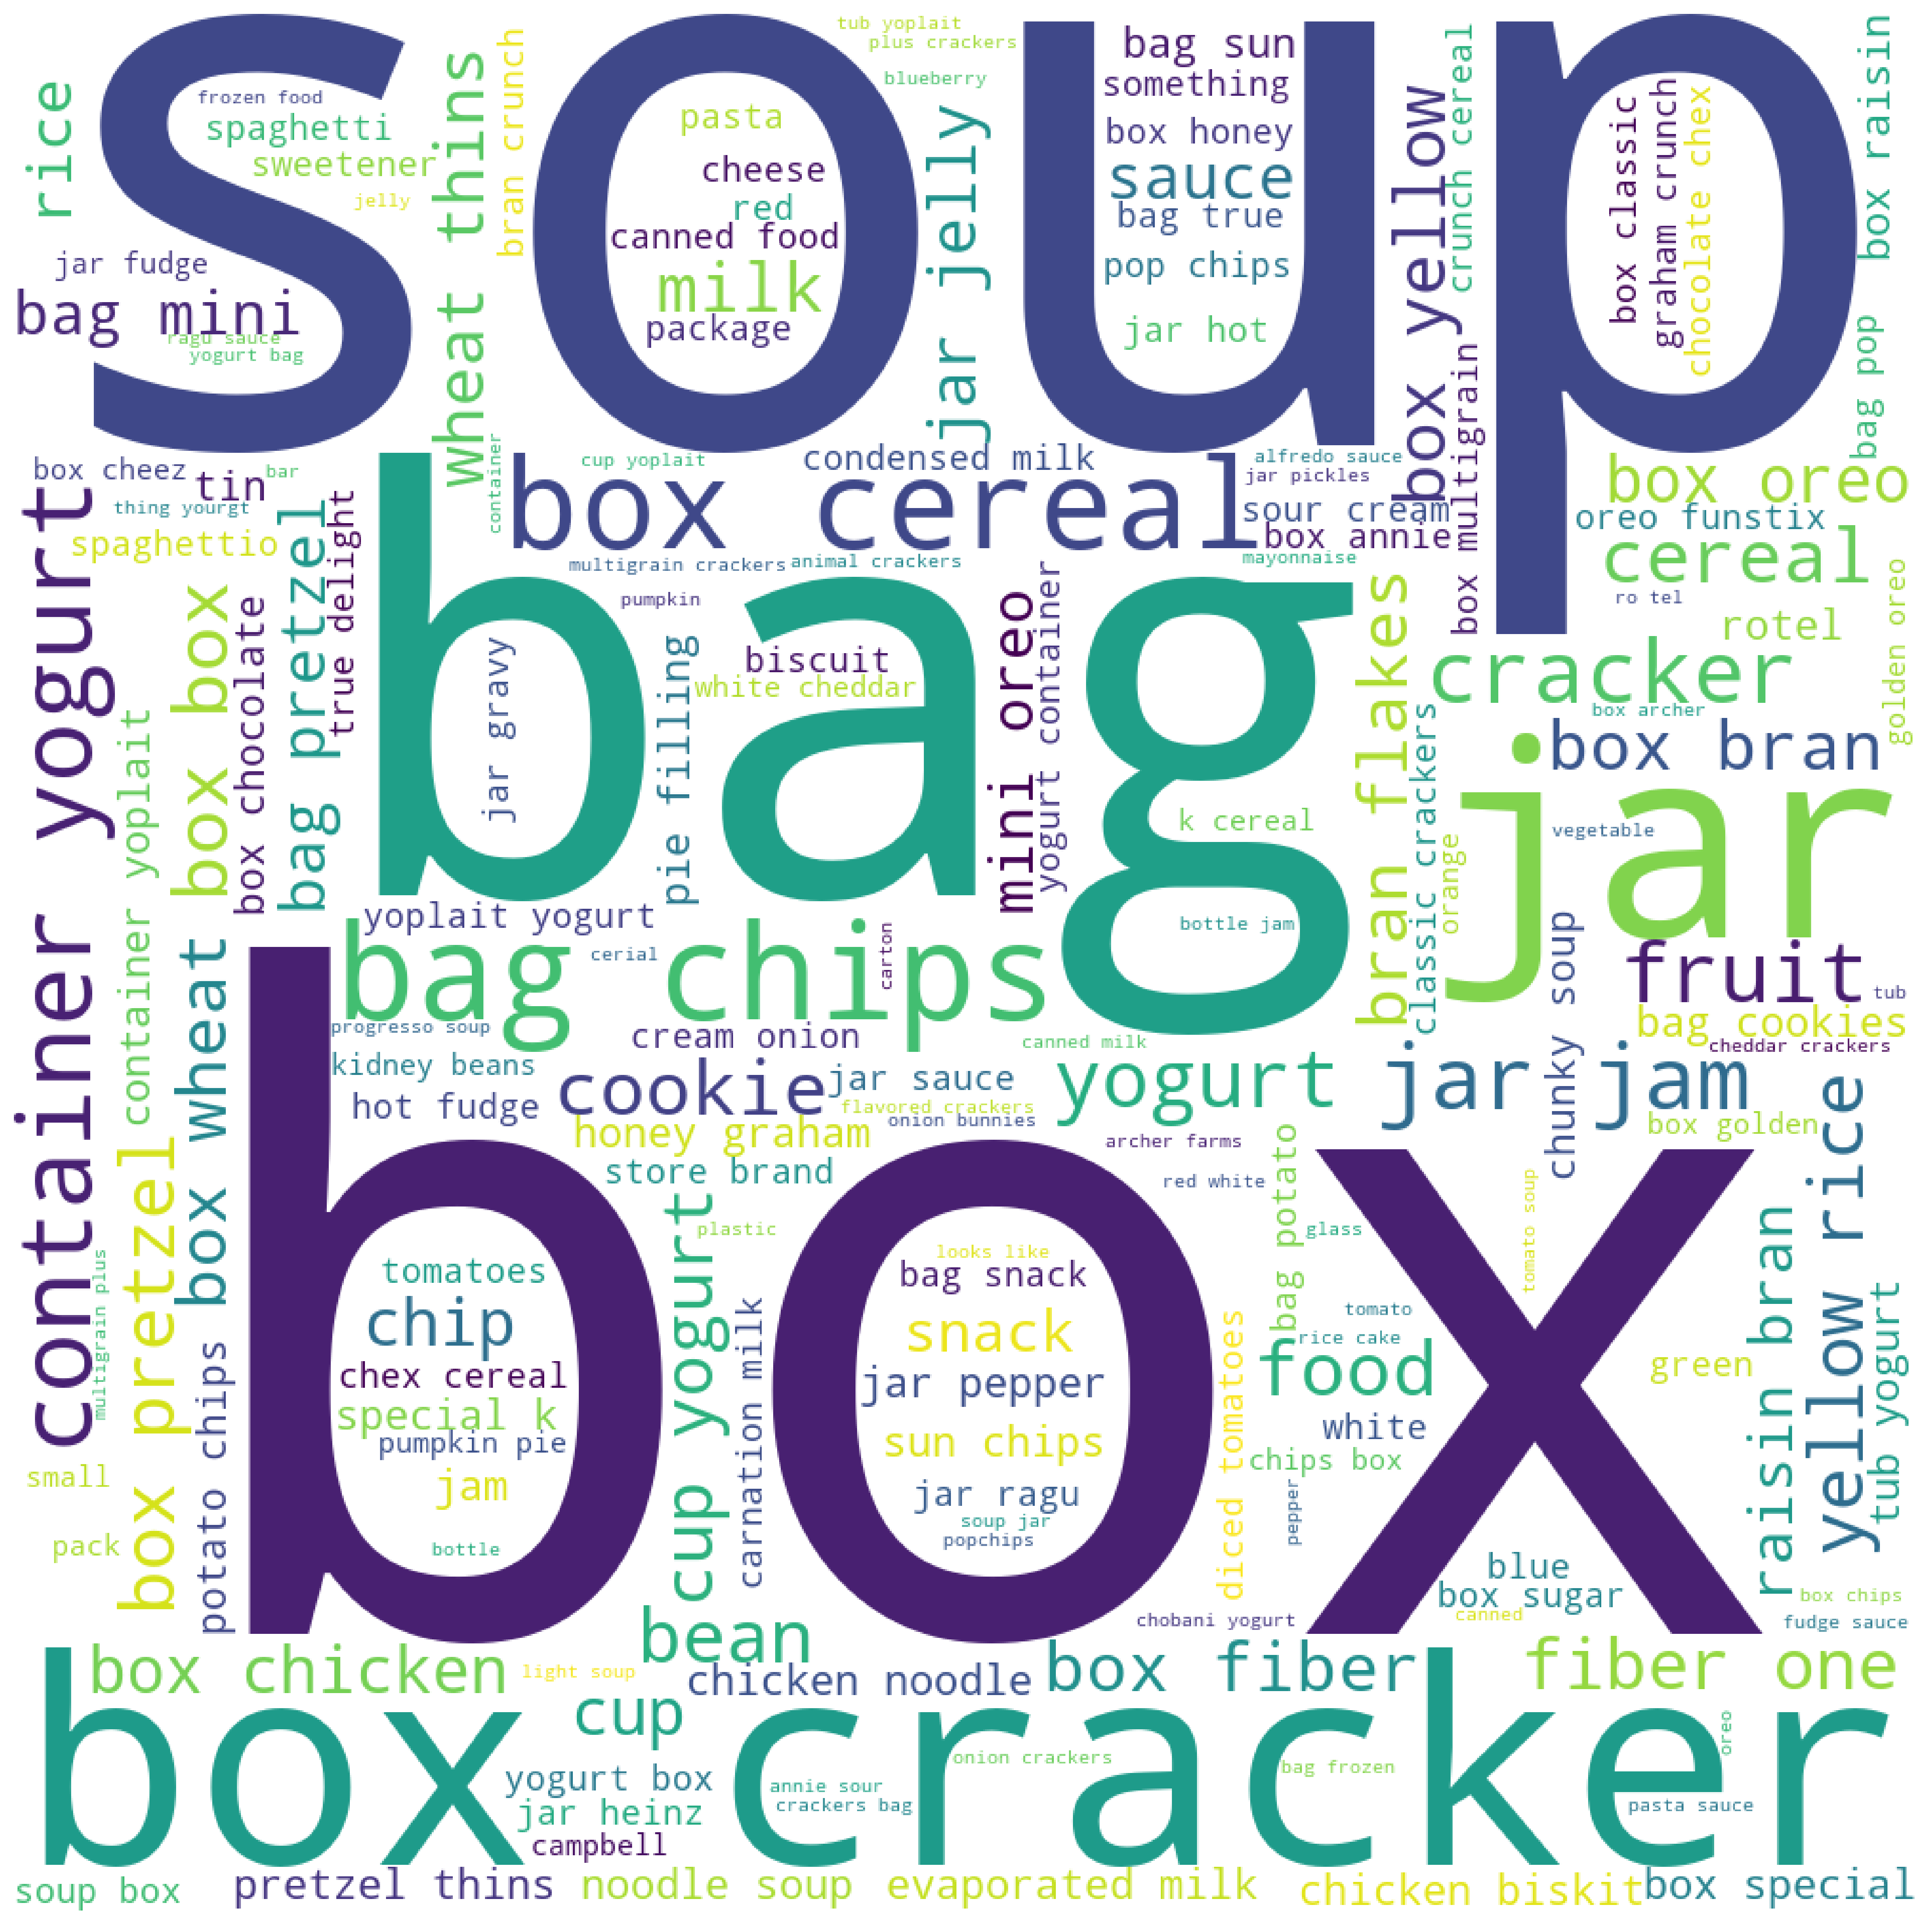

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



plt.rcParams["figure.figsize"] = [16, 9]
plt.rcParams["figure.dpi"] = 300
seed = 42



# Create the wordcloud
wordcloud = WordCloud(width = 1000, height = 1000,
                      background_color ='white',
                      stopwords = stop_words,
                      random_state = seed,
                      min_font_size = 10).generate(" ".join(df["descriptions"]))

# Plot the wordcloud
plt.figure(figsize = (16, 16), dpi = 300, facecolor = None)


plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show() 

We can also create a bar chart to show the distribution of object states in the dataset. We can use the seaborn library to create the bar chart.

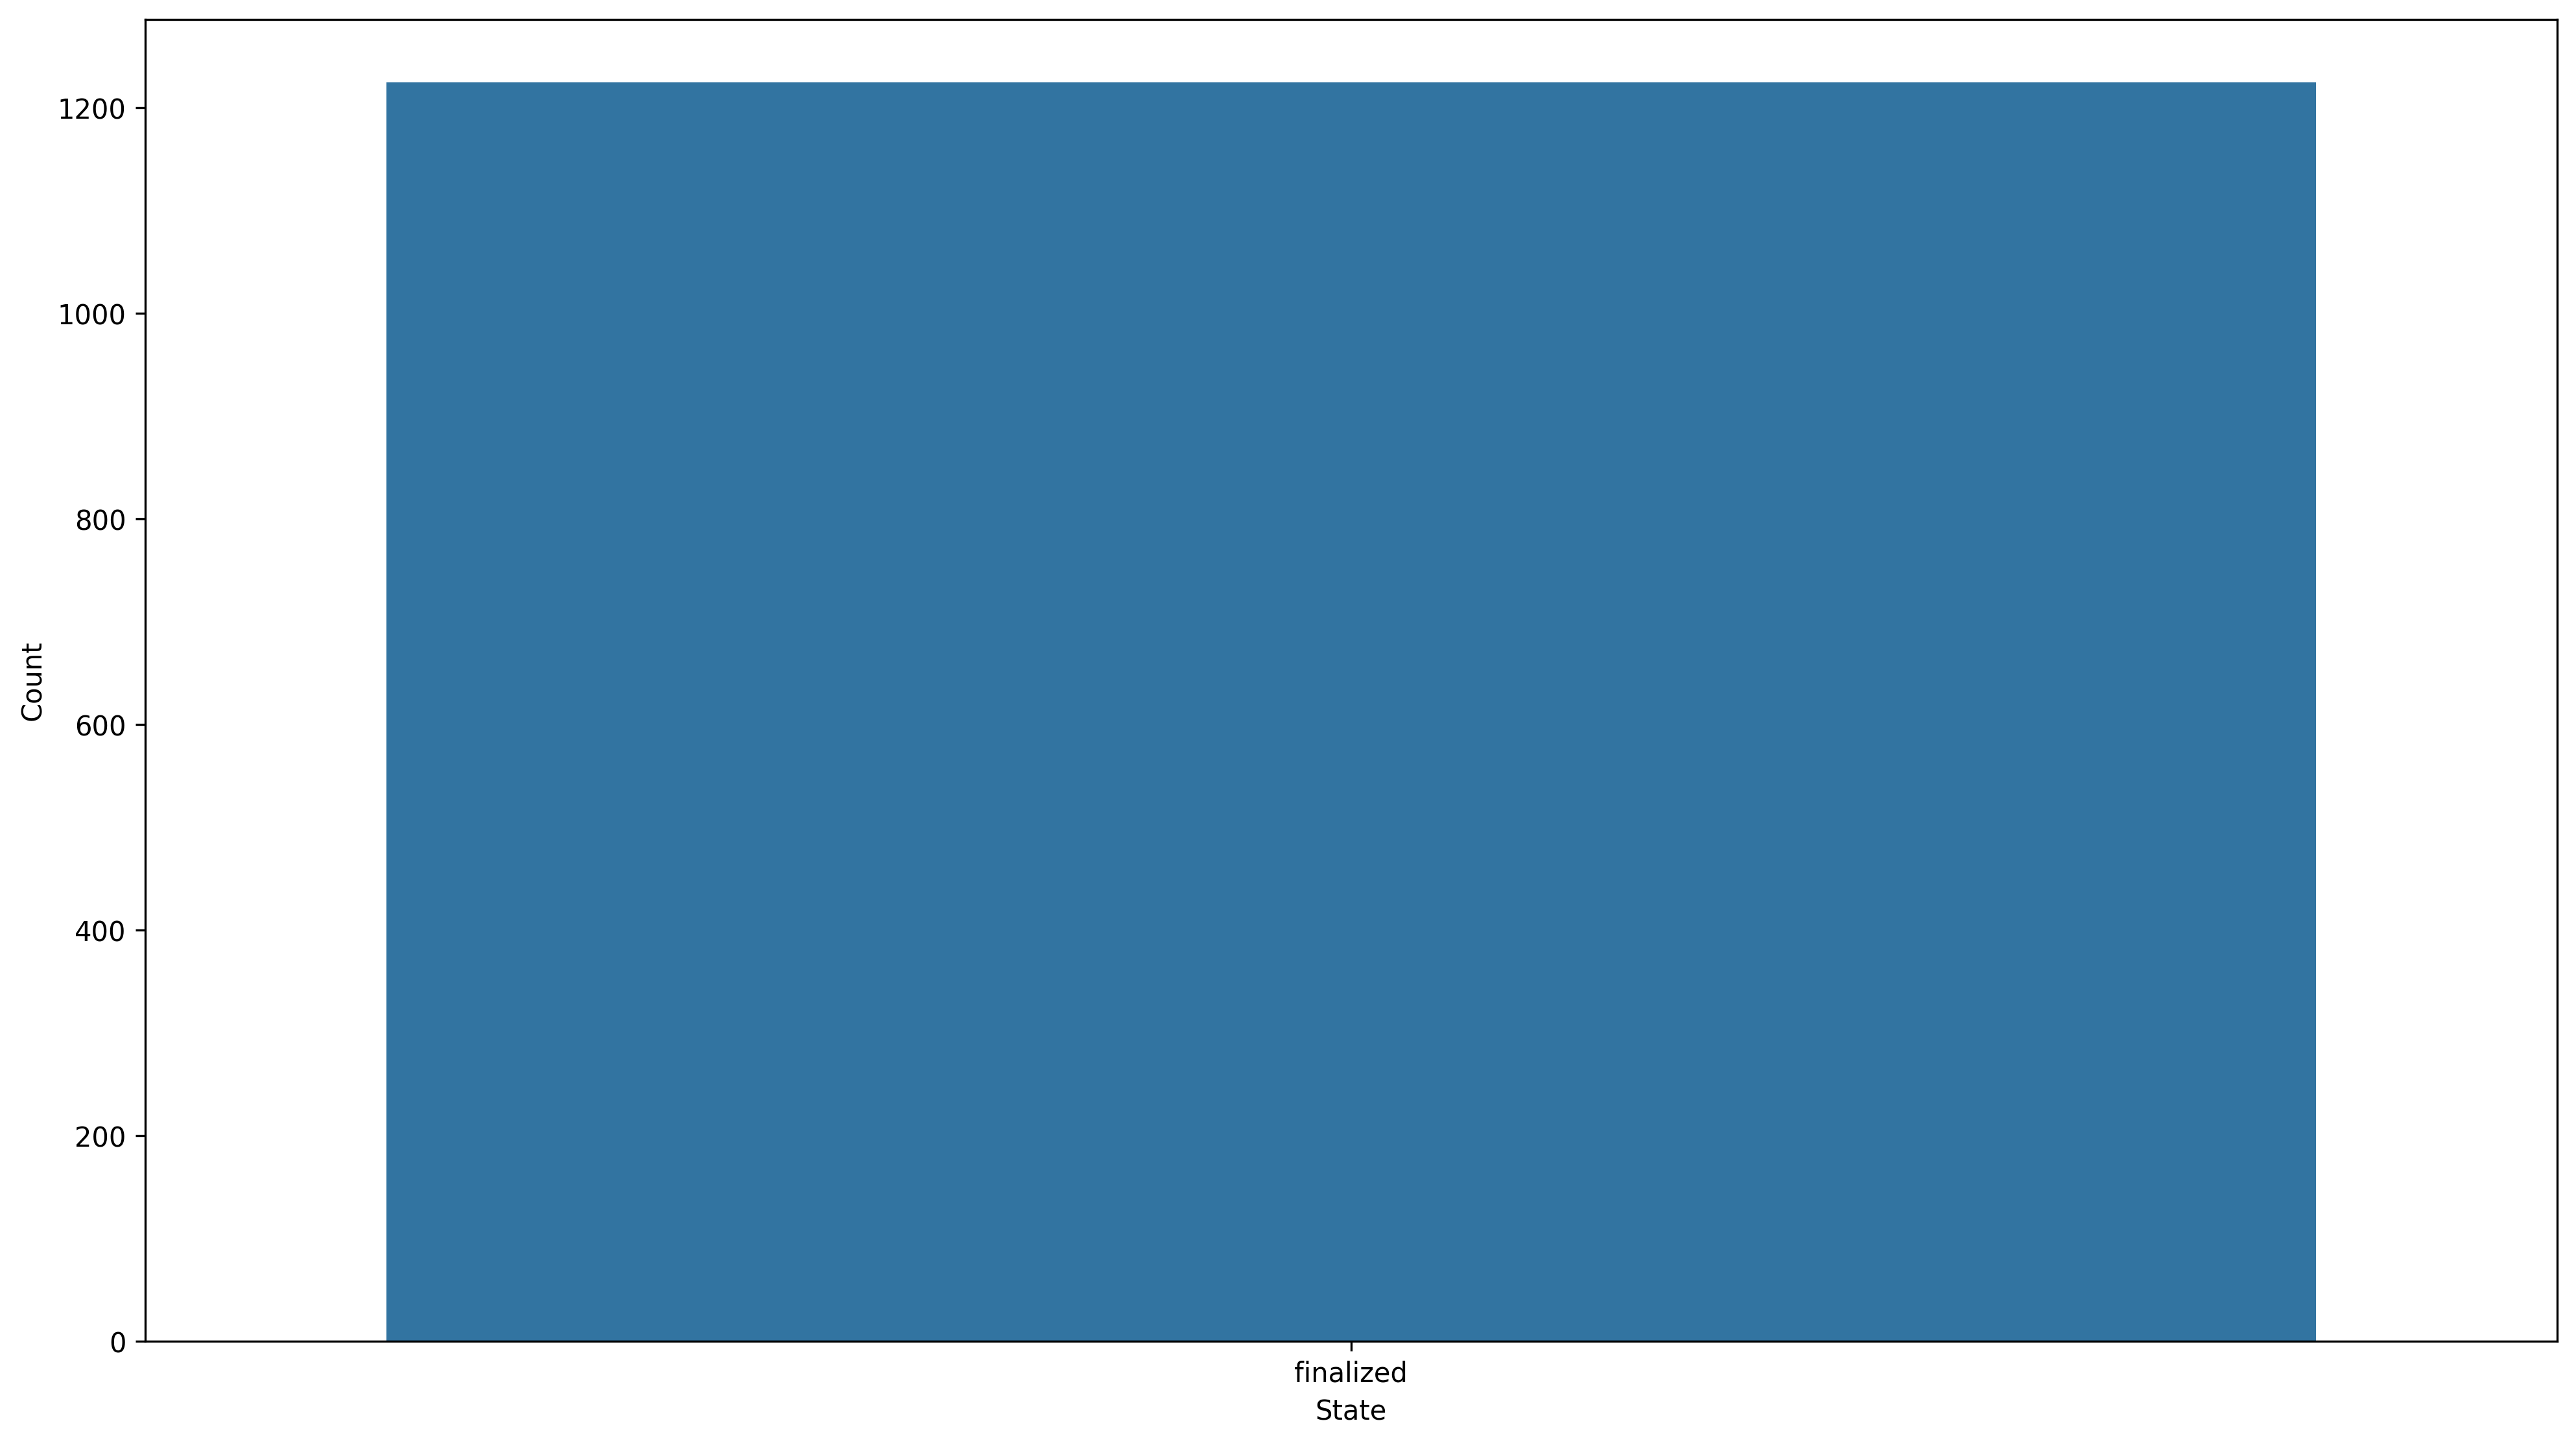

In [10]:
import seaborn as sns



# Count the number of instances of each category
state_counts = df["_unit_state"].value_counts()


# Create a bar chart
sns.barplot(x = state_counts.index, y = state_counts.values)


plt.xlabel("State")
plt.ylabel("Count")

plt.show()

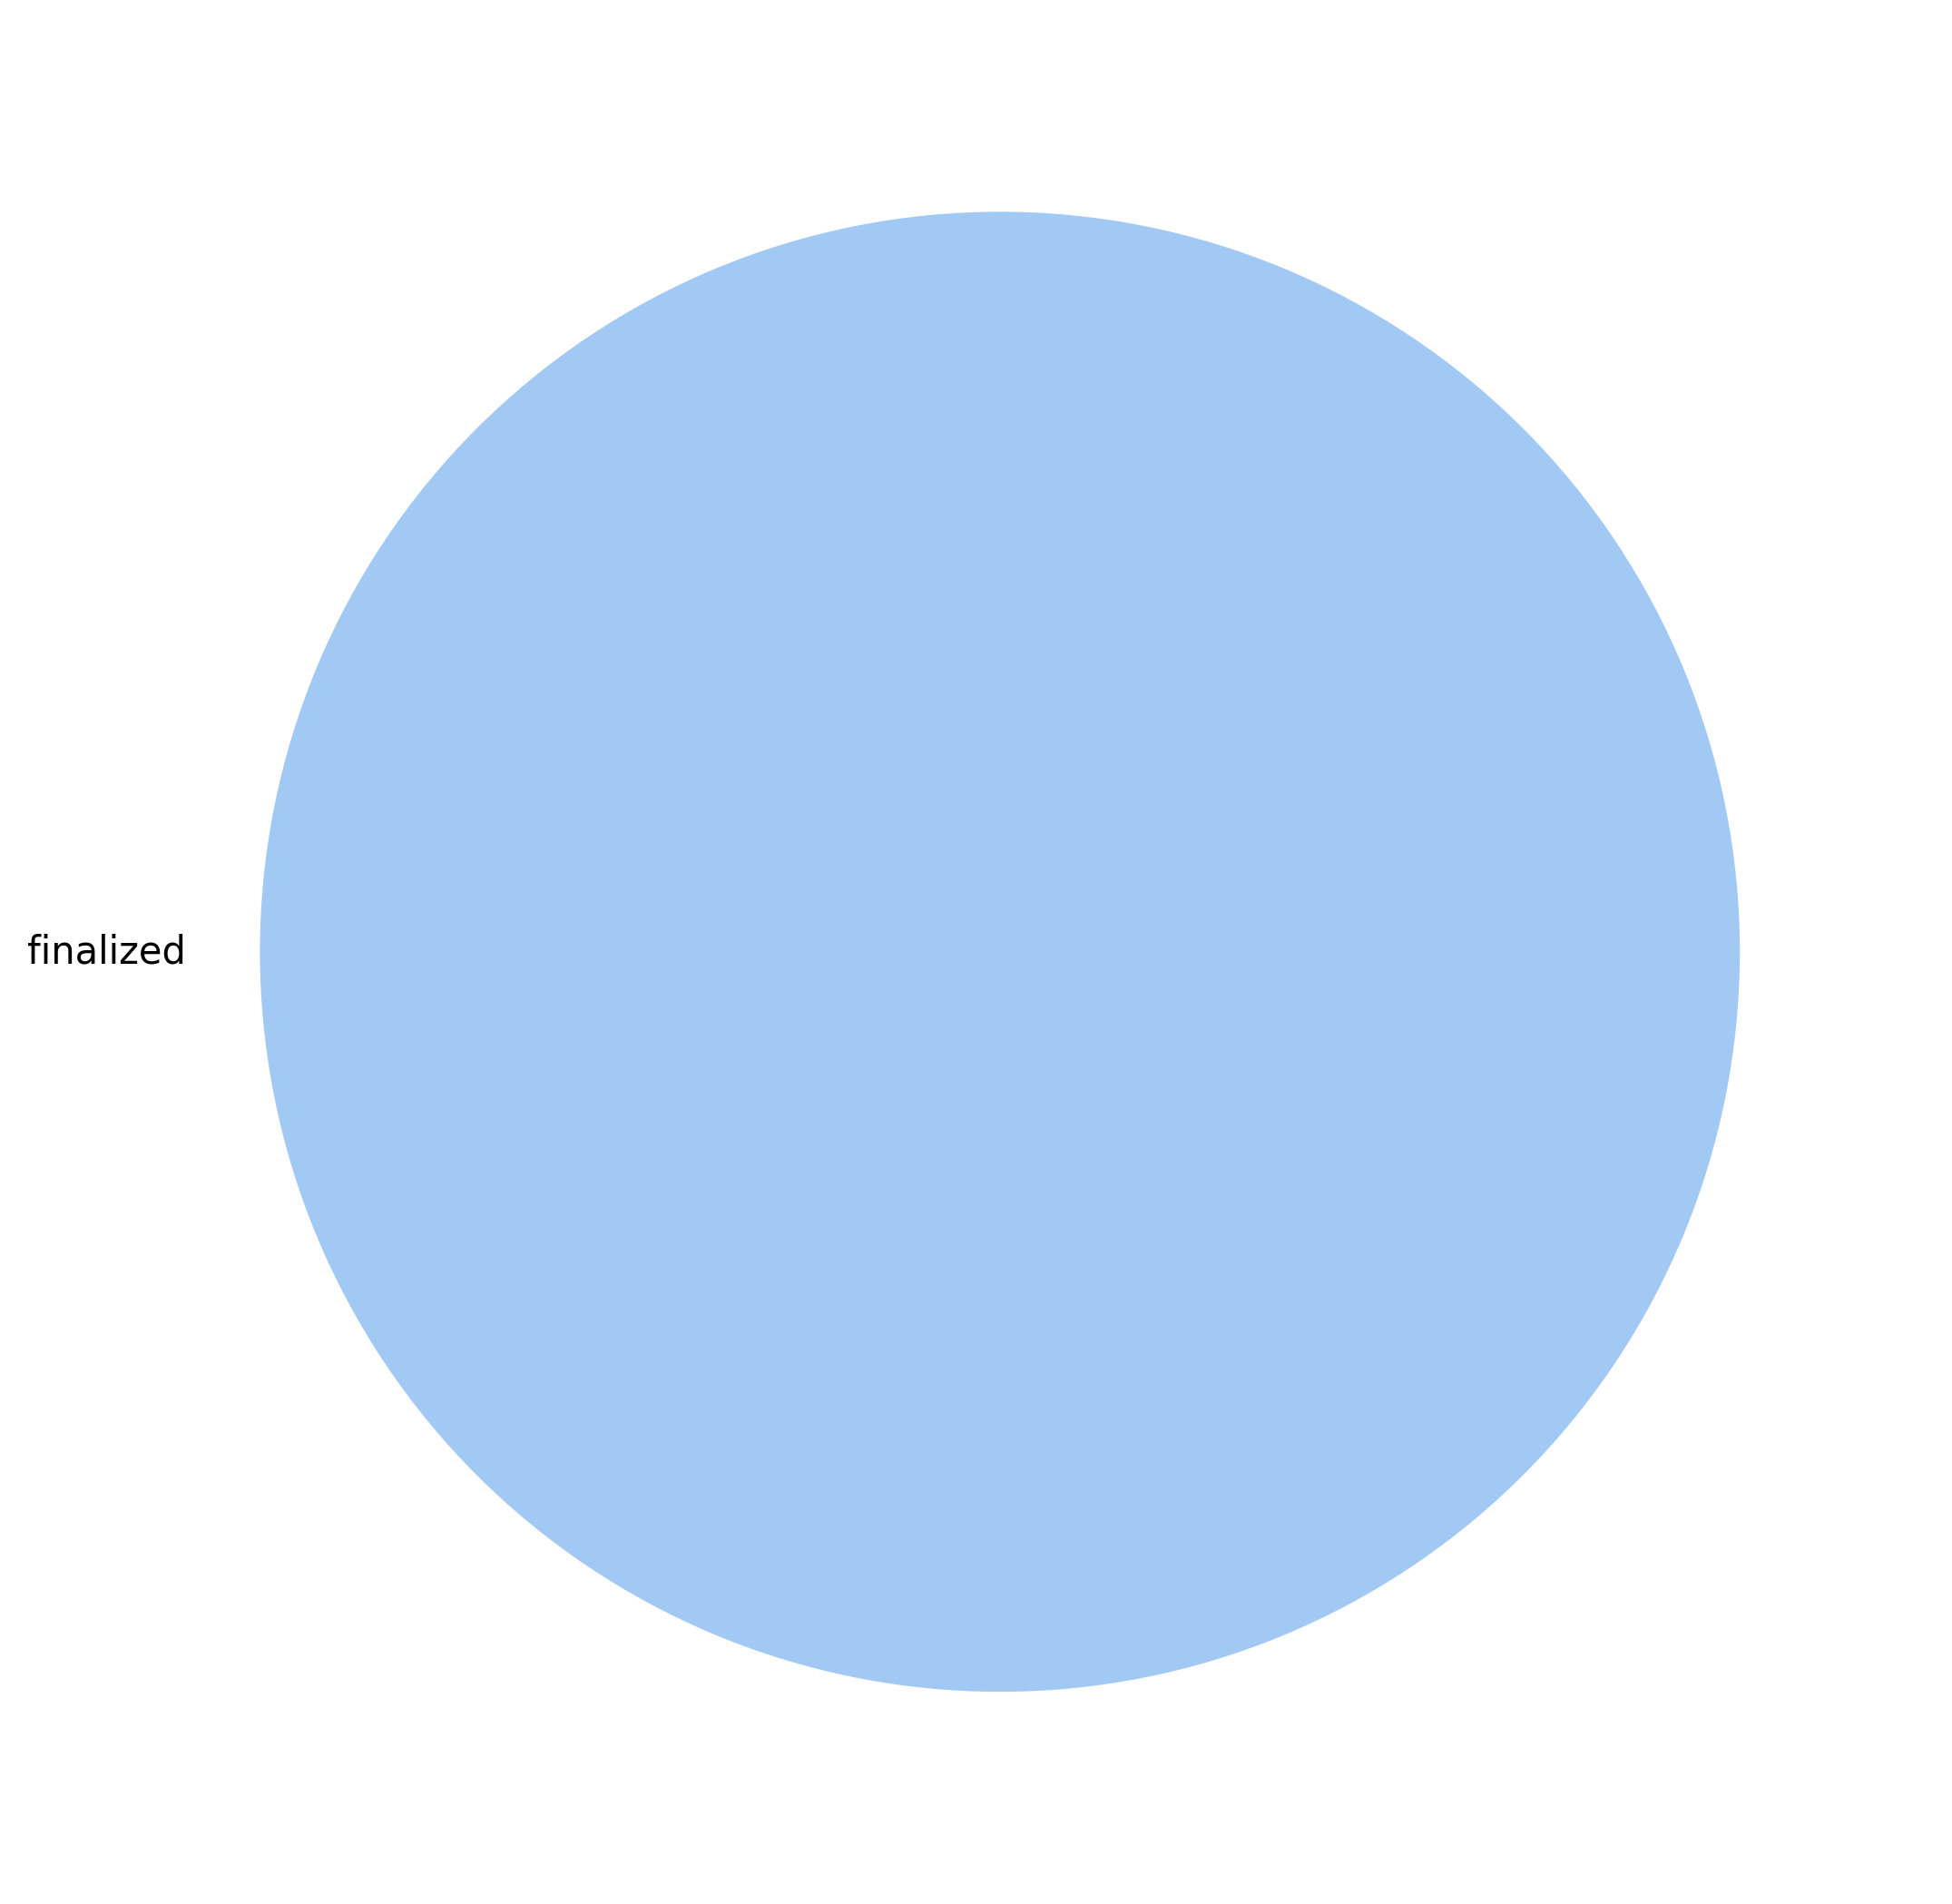

In [11]:
# Define Seaborn color palette to use
colors = sns.color_palette('pastel')

# Create a pie chart
plt.pie(state_counts.values, labels = state_counts.index, colors = colors)


plt.show()

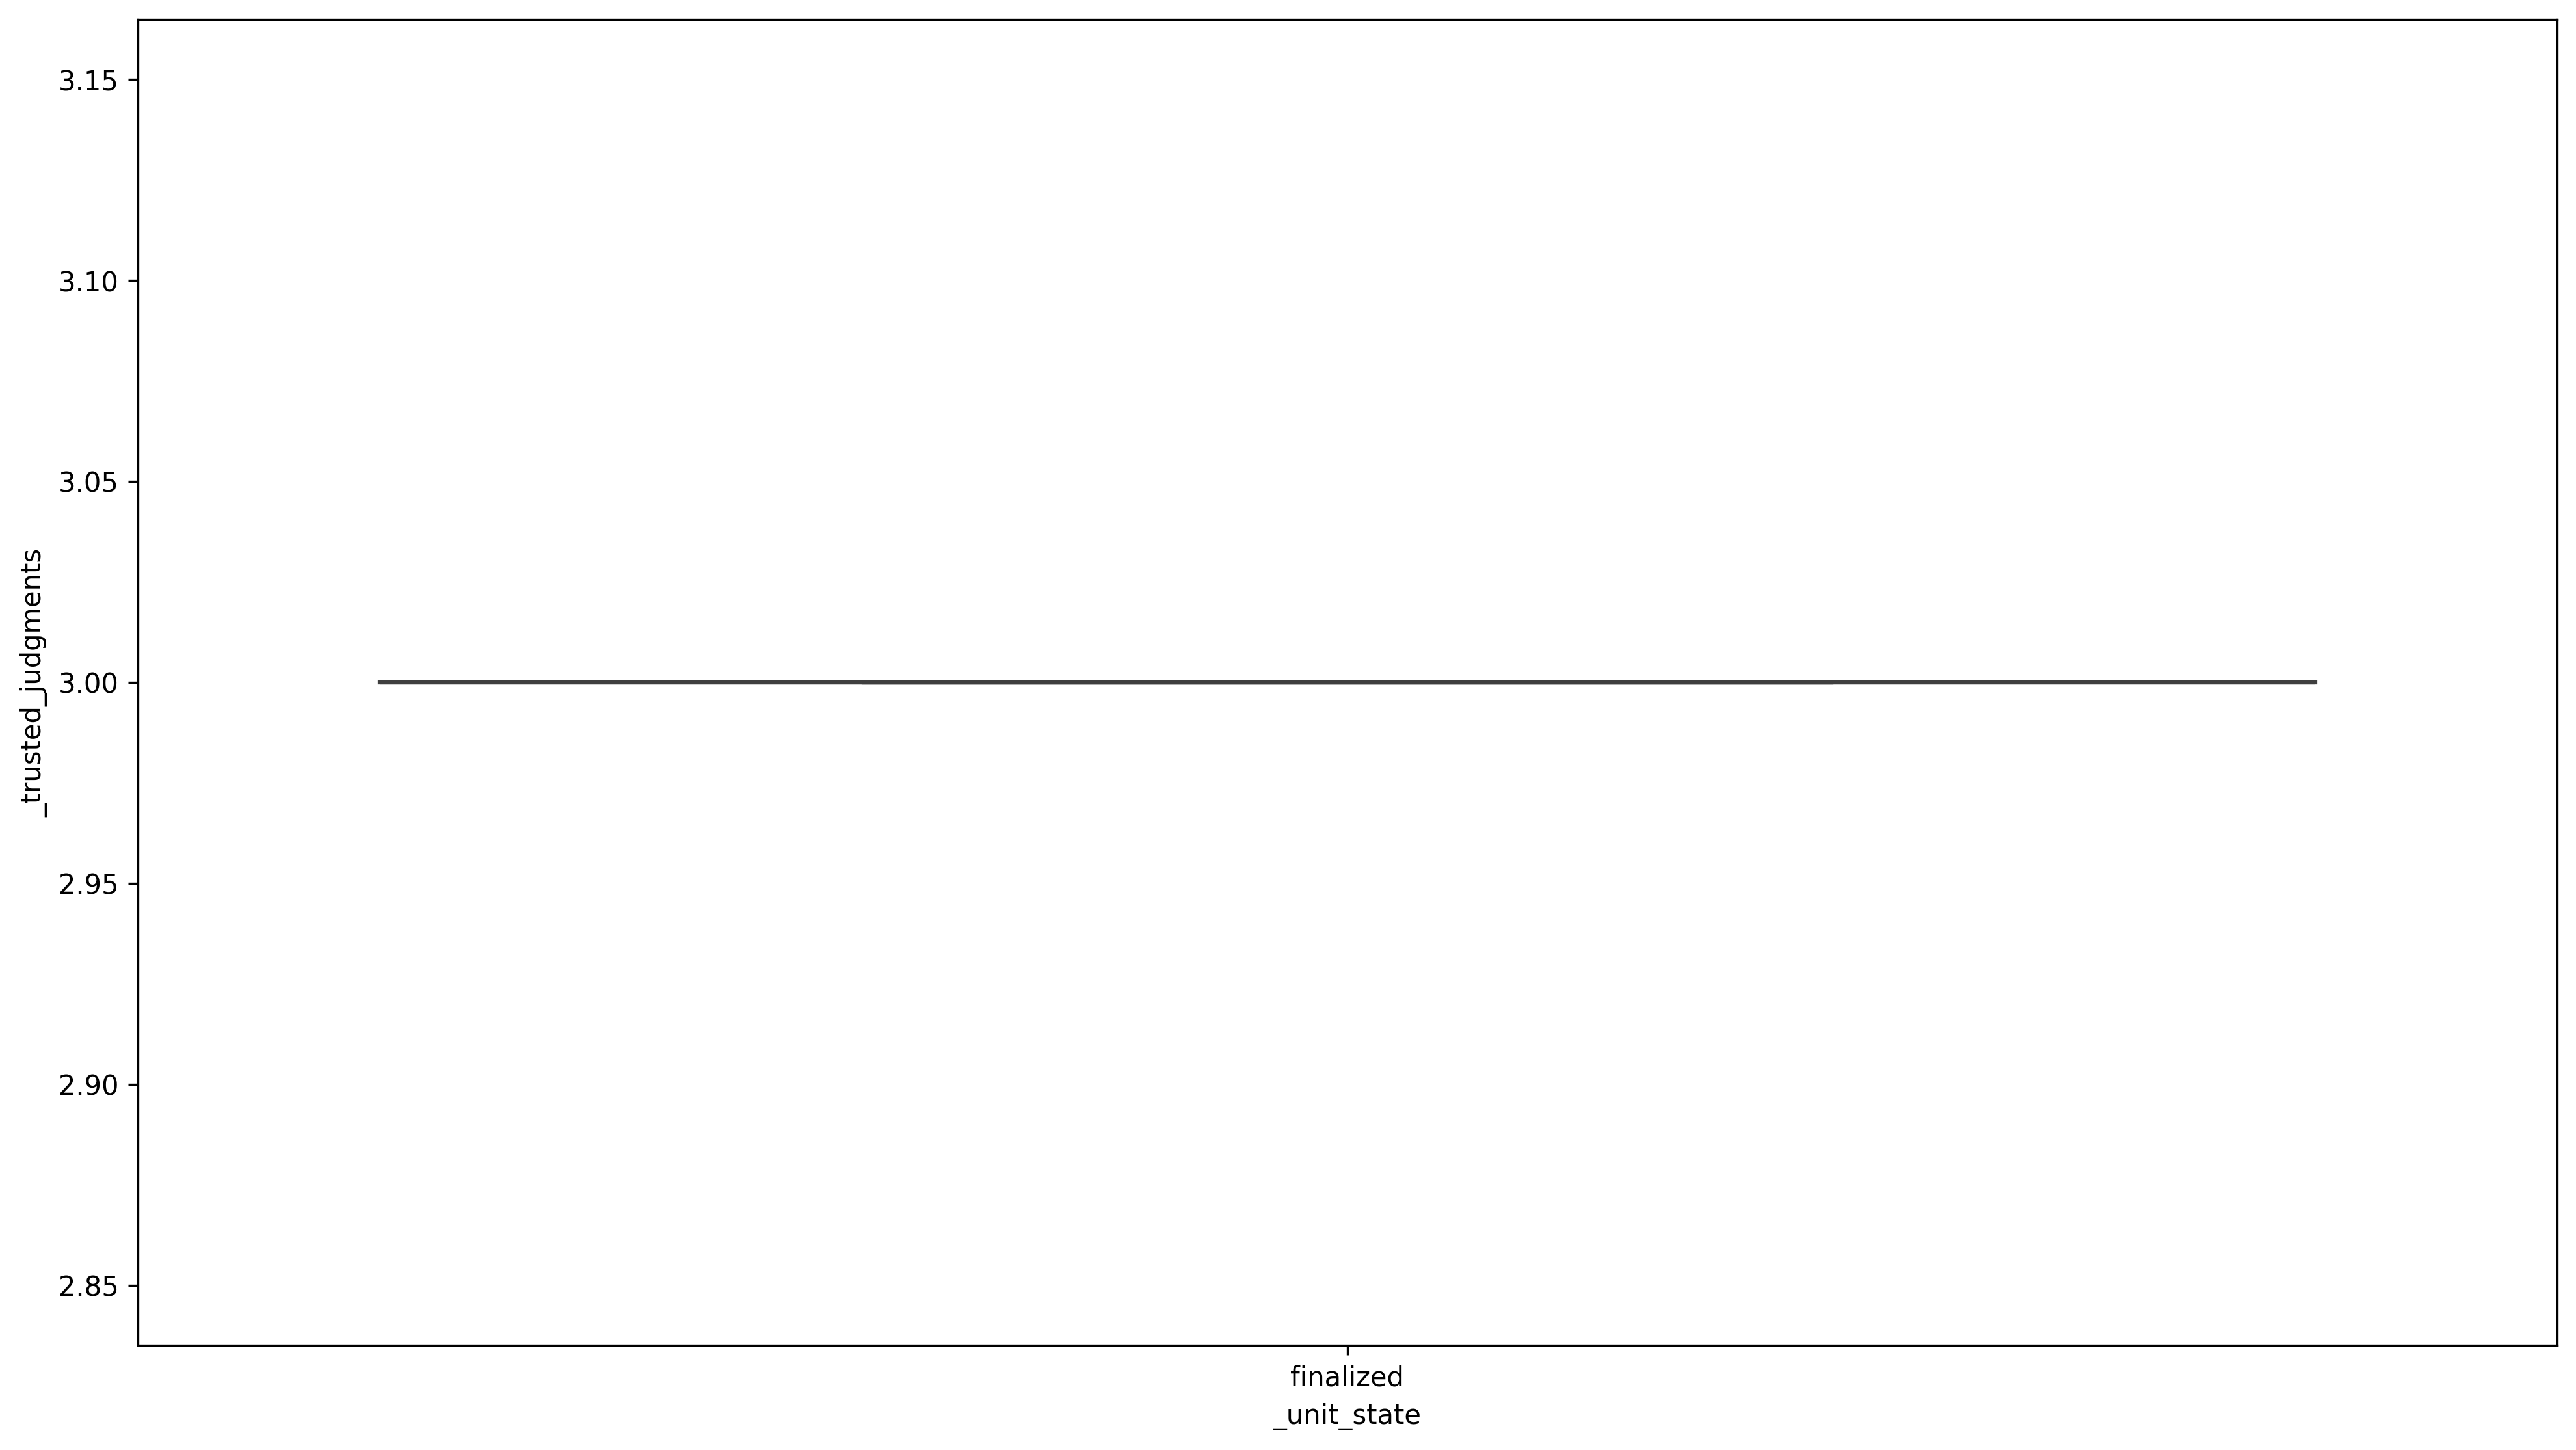

In [12]:
# Create a box plot
sns.boxplot(data = df, x = "_unit_state", y = "_trusted_judgments")


plt.show()